# Projeto: Machine Learning II
***Projeto Santander Coders 2023.2 | Ada***

**Professor:** Jorge Chamby-Diaz

**Descrição:** Este notebook contém o desenvolvimento do projeto proposto como conclusão da disciplina de `Machine Learning II`.

**Dataset(s) Utilizado(s):** [covid19br](https://github.com/wcota/covid19br/)

> W. Cota, “Monitoring the number of COVID-19 cases and deaths in brazil at municipal and federative units level”, SciELOPreprints:362 (2020), 10.1590/scielopreprints.362

## Parte 0: Bibliotecas Utilizadas e Imports

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Parte 1: Visualizando o conjunto de dados

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')

# Como sugerido pelo autor do dataset
# vamos alterar a coluna 'date' para um formato 'datatime'
df['date'] = pd.to_datetime(df['date'])

df.head(10)

epi_week       date country  state   city  newDeaths  deaths  newCases  \
0         9 2020-02-25  Brazil     SP  TOTAL          0       0         1   
1         9 2020-02-25  Brazil  TOTAL  TOTAL          0       0         1   
2         9 2020-02-26  Brazil     SP  TOTAL          0       0         0   
3         9 2020-02-26  Brazil  TOTAL  TOTAL          0       0         0   
4         9 2020-02-27  Brazil     SP  TOTAL          0       0         0   
5         9 2020-02-27  Brazil  TOTAL  TOTAL          0       0         0   
6         9 2020-02-28  Brazil     SP  TOTAL          0       0         1   
7         9 2020-02-28  Brazil  TOTAL  TOTAL          0       0         1   
8         9 2020-02-29  Brazil     SP  TOTAL          0       0         0   
9         9 2020-02-29  Brazil  TOTAL  TOTAL          0       0         0   

   totalCases  deathsMS  ...  tests  tests_per_100k_inhabitants  vaccinated  \
0           1         0  ...    NaN                         NaN         NaN   
1           1         0  ...    NaN                         NaN         NaN   
2           1         0  ...    NaN                         NaN         NaN   
3           1         0  ...    NaN                         NaN         NaN   
4           1         0  ...    NaN                         NaN         NaN   
5           1         0  ...    NaN                         NaN         NaN   
6           2         0  ...    NaN                         NaN         NaN   
7           2         0  ...    NaN                         NaN         NaN   
8           2         0  ...    NaN                         NaN         NaN   
9           2         0  ...    NaN                         NaN         NaN   

   vaccinated_per_100_inhabitants  vaccinated_second  \
0                             NaN                NaN   
1                             NaN                NaN   
2                             NaN                NaN   
3                             NaN                NaN   
4                             NaN                NaN   
5                             NaN                NaN   
6                             NaN                NaN   
7                             NaN                NaN   
8                             NaN                NaN   
9                             NaN                NaN   

   vaccinated_second_per_100_inhabitants  vaccinated_single  \
0                                    NaN                NaN   
1                                    NaN                NaN   
2                                    NaN                NaN   
3                                    NaN                NaN   
4                                    NaN                NaN   
5                                    NaN                NaN   
6                                    NaN                NaN   
7                                    NaN                NaN   
8                                    NaN                NaN   
9                                    NaN                NaN   

   vaccinated_single_per_100_inhabitants  vaccinated_third  \
0                                    NaN               NaN   
1                                    NaN               NaN   
2                                    NaN               NaN   
3                                    NaN               NaN   
4                                    NaN               NaN   
5                                    NaN               NaN   
6                                    NaN               NaN   
7                                    NaN               NaN   
8                                    NaN               NaN   
9                                    NaN               NaN   

   vaccinated_third_per_100_inhabitants  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4                                   NaN  
5                                   NaN

In [23]:
print('Shape: ', df.shape)
df.info()

Shape:  (30842, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30842 entries, 0 to 30841
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   epi_week                               30842 non-null  int64         
 1   date                                   30842 non-null  datetime64[ns]
 2   country                                30842 non-null  object        
 3   state                                  30842 non-null  object        
 4   city                                   30842 non-null  object        
 5   newDeaths                              30842 non-null  int64         
 6   deaths                                 30842 non-null  int64         
 7   newCases                               30842 non-null  int64         
 8   totalCases                             30842 non-null  int64         
 9   deathsMS                               30

Com a ajuda da descrição das colunas fornecida pelo autor [aqui](https://github.com/wcota/covid19br/blob/master/DESCRIPTION.md), vamos filtrar alguns dados e criar novas colunas que podem ser úteis para nossa análise:

In [24]:
# Criando novas colunas
df['active_cases'] = df['totalCases'] - df['deaths'] - df['recovered']

In [25]:
df[['epi_week', 'vaccinated', 'vaccinated_second', 'vaccinated_third', 'active_cases']].head(10)

epi_week  vaccinated  vaccinated_second  vaccinated_third  active_cases
0         9         NaN                NaN               NaN           NaN
1         9         NaN                NaN               NaN           NaN
2         9         NaN                NaN               NaN           NaN
3         9         NaN                NaN               NaN           NaN
4         9         NaN                NaN               NaN           NaN
5         9         NaN                NaN               NaN           NaN
6         9         NaN                NaN               NaN           NaN
7         9         NaN                NaN               NaN           NaN
8         9         NaN                NaN               NaN           NaN
9         9         NaN                NaN               NaN           NaN

In [26]:
df[['epi_week', 'vaccinated', 'vaccinated_second', 'vaccinated_third', 'active_cases']].tail(10)

epi_week   vaccinated  vaccinated_second  vaccinated_third  \
30832       311   14716972.0         13809945.0        12211486.0   
30833       311    2979308.0          2772139.0         2030138.0   
30834       311    1328876.0          1186864.0          697735.0   
30835       311     473511.0           369284.0          175984.0   
30836       311    9877242.0          9431834.0         8439439.0   
30837       311    6308275.0          5862014.0         4166331.0   
30838       311    2023048.0          1860868.0         1376006.0   
30839       311   43381275.0         40857206.0        29057424.0   
30840       311    1183632.0          1029319.0          595805.0   
30841       311  183869403.0        170385963.0       126348017.0   

       active_cases  
30832      728776.0  
30833      197245.0  
30834      116795.0  
30835       28436.0  
30836      774032.0  
30837      356600.0  
30838       39613.0  
30839     1440403.0  
30840       79842.0  
30841     9004794.0

### O que é possível entender a partir desses dados?
<h4>Descrição das colunas</h4>

| coluna | descrição |
| :--- | --- |
| epi_week | Representa a semana epidemiológica, agregada ao ano da epidemia. Ano 2020 conta como ano 0, e é representado pelos valores 1 a 53. Ano 2021 é representado pelos números 101 a 152, e assim por diante. |
| date | Data de divulgação |
| country | Nome do país (sempre Brazil) |
| state | Nome da unidade federativa |
| city | Sempre “TOTAL” |
| newDeaths | Número de novos óbitos divulgados |
| deaths | Número acumulado de óbitos |
| newCases | Número de novos casos divulgados |
| totalCases | Número acumulado de casos |
| deathsMS | Número acumulado de obitos pelo Ministério da Saúde |
| totalCasesMS | Número acumulado de casos pelo Ministério da Saúde |
| deaths_per_100k_inhabitants | Número de óbitos por 100 mil habitantes |
| totalCases_per_100k_inhabitants | Número de casos por 100 mil habitantes |
| deaths_by_totalCases | Razão entre número de óbitos e casos (`deaths`/`totalCases`) |
| recovered | Número de recuperados |
| suspects | Número de suspeitos |
| tests | Número de testes realizados |
| tests_per_100k_inhabitants | Número de testes realizados por 100 mil habitantes |
| vaccinated | Número de pessoas que receberam a primeira dose |
| vaccinated_per_100_inhabitants | Porcentagem de pessoas que receberam a primeira dose |
| vaccinated_second | Número de pessoas que receberam a segunda dose |
| vaccinated_second_per_100_inhabitants | Porcentagem de pessoas que receberam a segunda dose |
| vaccinated_single | Número de pessoas que receberam a dose única |
| vaccinated_single_per_100_inhabitants | Porcentagem de pessoas que receberam a dose única |
| vaccinated_third | Número de pessoas que receberam a dose de reforço |
| vaccinated_third_per_100_inhabitants | Porcentagem de pessoas que receberam a dose de reforço |
| active_cases | Casos ainda ativos |

Dessa forma, vemos que algumas colunas podem ser descartadas antes de começarmos a analisar os dados. Serão elas:
- `country`: possui sempre o valor `Brazil`, informação que já temos de forma geral.
- `city`: possui sempre o valor `TOTAL`, que não nos informa nada específico.
- `death_by_totalCases`: é um valor diretamente relacionado a dois valores que já possuímos.
- `deathsMS`: se relaciona à mesma informação da coluna `deaths`.
- `totalCasesMS`: se relaciona à mesma informação da coluna `totalCases`.

Além disso, algumas colunas mostram valores brutos, enquanto outras mostram valores ajustados para uma comparação entre estados com populações diferentes. Transformar-lo-emos em 2 _datasets_ distintos.

Outro ponto perceptível é que existe um conjunto de entradas, marcados na coluna `state` com o valor `TOTAL`, que representa o valor acumulado entre todos os estados. Vamos filtrar o conjunto, excluindo essas linhas.

In [27]:
# Tratamento: Removendo agregação em 'state'
df = df[df['state'] != 'TOTAL']
df.head(10)

epi_week       date country state   city  newDeaths  deaths  newCases  \
0          9 2020-02-25  Brazil    SP  TOTAL          0       0         1   
2          9 2020-02-26  Brazil    SP  TOTAL          0       0         0   
4          9 2020-02-27  Brazil    SP  TOTAL          0       0         0   
6          9 2020-02-28  Brazil    SP  TOTAL          0       0         1   
8          9 2020-02-29  Brazil    SP  TOTAL          0       0         0   
10        10 2020-03-01  Brazil    SP  TOTAL          0       0         0   
12        10 2020-03-02  Brazil    SP  TOTAL          0       0         0   
14        10 2020-03-03  Brazil    SP  TOTAL          0       0         0   
16        10 2020-03-04  Brazil    SP  TOTAL          0       0         1   
18        10 2020-03-05  Brazil    RJ  TOTAL          0       0         1   

    totalCases  deathsMS  ...  tests_per_100k_inhabitants  vaccinated  \
0            1         0  ...                         NaN         NaN   
2            1         0  ...                         NaN         NaN   
4            1         0  ...                         NaN         NaN   
6            2         0  ...                         NaN         NaN   
8            2         0  ...                         NaN         NaN   
10           2         0  ...                         NaN         NaN   
12           2         0  ...                         NaN         NaN   
14           2         0  ...                         NaN         NaN   
16           3         0  ...                         NaN         NaN   
18           1         0  ...                         NaN         NaN   

    vaccinated_per_100_inhabitants  vaccinated_second  \
0                              NaN                NaN   
2                              NaN                NaN   
4                              NaN                NaN   
6                              NaN                NaN   
8                              NaN                NaN   
10                             NaN                NaN   
12                             NaN                NaN   
14                             NaN                NaN   
16                             NaN                NaN   
18                             NaN                NaN   

    vaccinated_second_per_100_inhabitants  vaccinated_single  \
0                                     NaN                NaN   
2                                     NaN                NaN   
4                                     NaN                NaN   
6                                     NaN                NaN   
8                                     NaN                NaN   
10                                    NaN                NaN   
12                                    NaN                NaN   
14                                    NaN                NaN   
16                                    NaN                NaN   
18                                    NaN                NaN   

    vaccinated_single_per_100_inhabitants  vaccinated_third  \
0                                     NaN               NaN   
2                                     NaN               NaN   
4                                     NaN               NaN   
6                                     NaN               NaN   
8                                     NaN               NaN   
10                                    NaN               NaN   
12                                    NaN               NaN   
14                                    NaN               NaN   
16                                    NaN               NaN   
18                                    NaN               NaN   

    vaccinated_third_per_100_inhabitants  active_cases  
0                                    NaN           NaN  
2                                    NaN           NaN  
4                                    NaN           NaN  
6                                    NaN           NaN  
8                                    NaN

In [28]:
drop_columns = ['country', 'city', 'deaths_by_totalCases', 'deathsMS', 'totalCasesMS']
dados_brutos = ['newDeaths', 'deaths', 'newCases', 'totalCases', 'recovered',
                'suspects', 'tests', 'vaccinated', 'vaccinated_second',
                'vaccinated_single', 'vaccinated_third', 'active_cases']
dados_ajustados = ['deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
                    'tests_per_100k_inhabitants', 'vaccinated_per_100_inhabitants',
                    'vaccinated_second_per_100_inhabitants', 'vaccinated_single_per_100_inhabitants',
                    'vaccinated_third_per_100_inhabitants']

# fazemos drops no dataset original, combinando as colunas a serem descartadas de modo geral
# com as colunas que serao usadas apenas pelo dataset complementar
df_bruto = df.drop(columns=[*drop_columns, *dados_ajustados])
df_comparacao = df.drop(columns=[*drop_columns, *dados_brutos])

In [29]:
df_bruto.head(10)

epi_week       date state  newDeaths  deaths  newCases  totalCases  \
0          9 2020-02-25    SP          0       0         1           1   
2          9 2020-02-26    SP          0       0         0           1   
4          9 2020-02-27    SP          0       0         0           1   
6          9 2020-02-28    SP          0       0         1           2   
8          9 2020-02-29    SP          0       0         0           2   
10        10 2020-03-01    SP          0       0         0           2   
12        10 2020-03-02    SP          0       0         0           2   
14        10 2020-03-03    SP          0       0         0           2   
16        10 2020-03-04    SP          0       0         1           3   
18        10 2020-03-05    RJ          0       0         1           1   

    recovered  suspects  tests  vaccinated  vaccinated_second  \
0         NaN       NaN    NaN         NaN                NaN   
2         NaN       NaN    NaN         NaN                NaN   
4         NaN       NaN    NaN         NaN                NaN   
6         NaN       NaN    NaN         NaN                NaN   
8         NaN       NaN    NaN         NaN                NaN   
10        NaN       NaN    NaN         NaN                NaN   
12        NaN       NaN    NaN         NaN                NaN   
14        NaN       NaN    NaN         NaN                NaN   
16        NaN       NaN    NaN         NaN                NaN   
18        NaN       NaN    NaN         NaN                NaN   

    vaccinated_single  vaccinated_third  active_cases  
0                 NaN               NaN           NaN  
2                 NaN               NaN           NaN  
4                 NaN               NaN           NaN  
6                 NaN               NaN           NaN  
8                 NaN               NaN           NaN  
10                NaN               NaN           NaN  
12                NaN               NaN           NaN  
14                NaN               NaN           NaN  
16                NaN               NaN           NaN  
18                NaN               NaN           NaN

In [30]:
df_bruto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29724 entries, 0 to 30840
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   epi_week           29724 non-null  int64         
 1   date               29724 non-null  datetime64[ns]
 2   state              29724 non-null  object        
 3   newDeaths          29724 non-null  int64         
 4   deaths             29724 non-null  int64         
 5   newCases           29724 non-null  int64         
 6   totalCases         29724 non-null  int64         
 7   recovered          29108 non-null  float64       
 8   suspects           29157 non-null  float64       
 9   tests              28451 non-null  float64       
 10  vaccinated         21320 non-null  float64       
 11  vaccinated_second  20685 non-null  float64       
 12  vaccinated_single  17060 non-null  float64       
 13  vaccinated_third   14941 non-null  float64       
 14  active_case

In [31]:
df_comparacao.head(10)

epi_week       date state  deaths_per_100k_inhabitants  \
0          9 2020-02-25    SP                          0.0   
2          9 2020-02-26    SP                          0.0   
4          9 2020-02-27    SP                          0.0   
6          9 2020-02-28    SP                          0.0   
8          9 2020-02-29    SP                          0.0   
10        10 2020-03-01    SP                          0.0   
12        10 2020-03-02    SP                          0.0   
14        10 2020-03-03    SP                          0.0   
16        10 2020-03-04    SP                          0.0   
18        10 2020-03-05    RJ                          0.0   

    totalCases_per_100k_inhabitants  tests_per_100k_inhabitants  \
0                           0.00218                         NaN   
2                           0.00218                         NaN   
4                           0.00218                         NaN   
6                           0.00436                         NaN   
8                           0.00436                         NaN   
10                          0.00436                         NaN   
12                          0.00436                         NaN   
14                          0.00436                         NaN   
16                          0.00653                         NaN   
18                          0.00579                         NaN   

    vaccinated_per_100_inhabitants  vaccinated_second_per_100_inhabitants  \
0                              NaN                                    NaN   
2                              NaN                                    NaN   
4                              NaN                                    NaN   
6                              NaN                                    NaN   
8                              NaN                                    NaN   
10                             NaN                                    NaN   
12                             NaN                                    NaN   
14                             NaN                                    NaN   
16                             NaN                                    NaN   
18                             NaN                                    NaN   

    vaccinated_single_per_100_inhabitants  \
0                                     NaN   
2                                     NaN   
4                                     NaN   
6                                     NaN   
8                                     NaN   
10                                    NaN   
12                                    NaN   
14                                    NaN   
16                                    NaN   
18                                    NaN   

    vaccinated_third_per_100_inhabitants  
0                                    NaN  
2                                    NaN  
4                                    NaN  
6                                    NaN  
8                                    NaN  
10                                   NaN  
12                                   NaN  
14                                   NaN  
16                                   NaN  
18                                   NaN

In [32]:
df_comparacao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29724 entries, 0 to 30840
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   epi_week                               29724 non-null  int64         
 1   date                                   29724 non-null  datetime64[ns]
 2   state                                  29724 non-null  object        
 3   deaths_per_100k_inhabitants            29724 non-null  float64       
 4   totalCases_per_100k_inhabitants        29724 non-null  float64       
 5   tests_per_100k_inhabitants             28451 non-null  float64       
 6   vaccinated_per_100_inhabitants         21320 non-null  float64       
 7   vaccinated_second_per_100_inhabitants  20685 non-null  float64       
 8   vaccinated_single_per_100_inhabitants  17060 non-null  float64       
 9   vaccinated_third_per_100_inhabitants   14941 non-null  float64    

### Compreendendo as informações de maneira mais visual
Vamos tentar criar alguns gráficos, para começar a enteder o que podemos inferir dos dados, e quais problemas podemos levantar para tentar responder com modelos de _Machine Learning_.

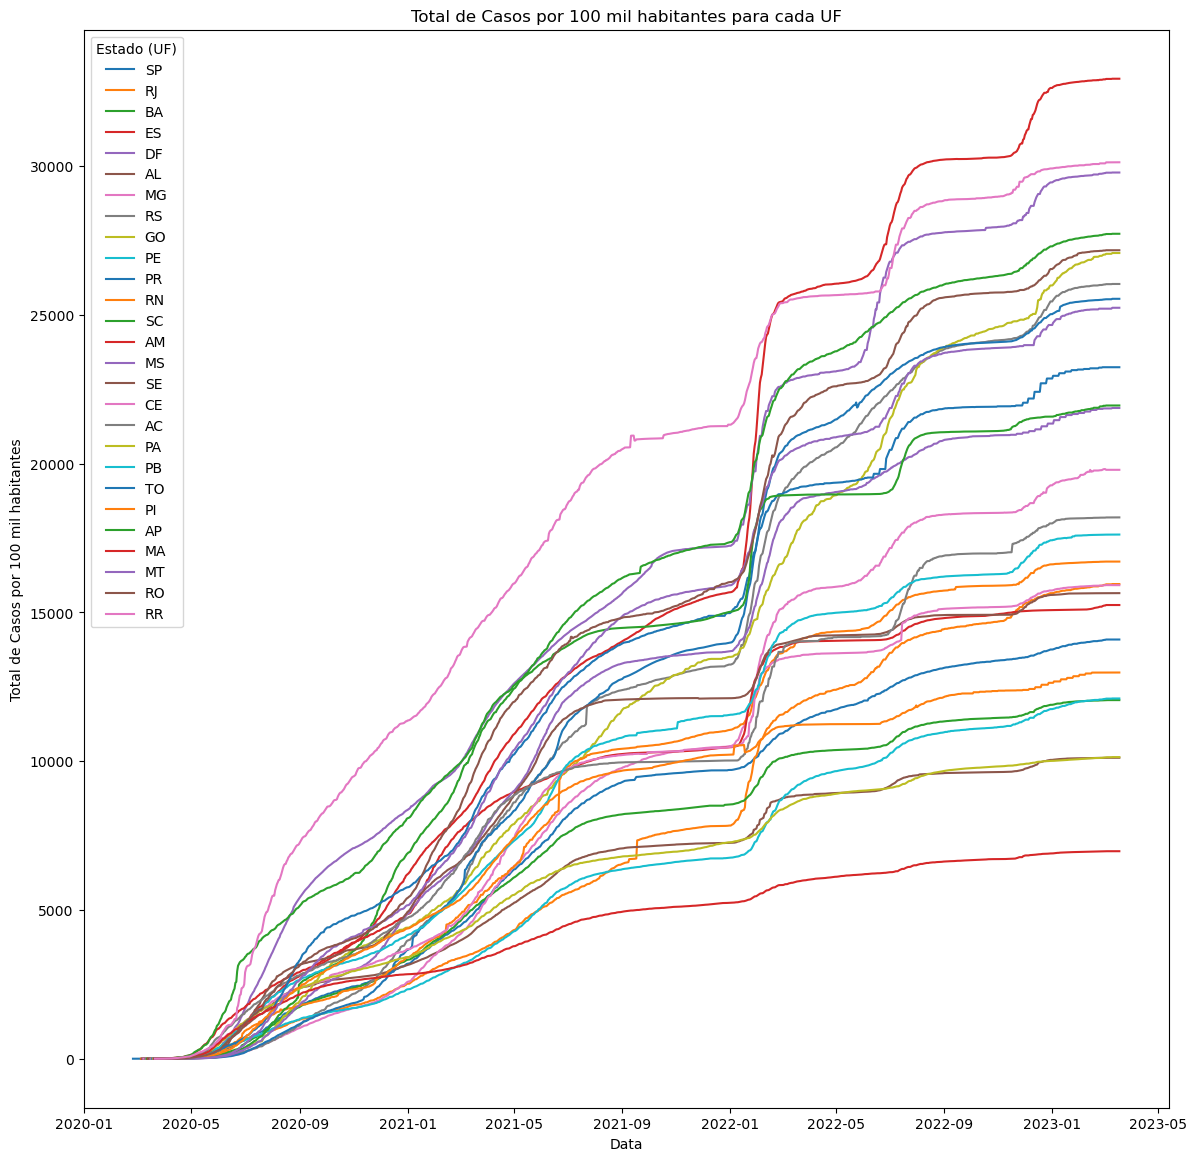

In [33]:
states = df_comparacao['state'].unique().tolist()

plt.figure(figsize=(14, 14))

for state in states:
    state_data = df_comparacao[df_comparacao['state'] == state]
    plt.plot(
        state_data['date'],
        state_data['totalCases_per_100k_inhabitants'],
        label=state,
        linestyle='-',
        )


plt.title('Total de Casos por 100 mil habitantes para cada UF')
plt.xlabel('Data')
plt.ylabel('Total de Casos por 100 mil habitantes')

# plt.gcf().autofmt_xdate()

plt.legend(title='Estado (UF)')

plt.show()

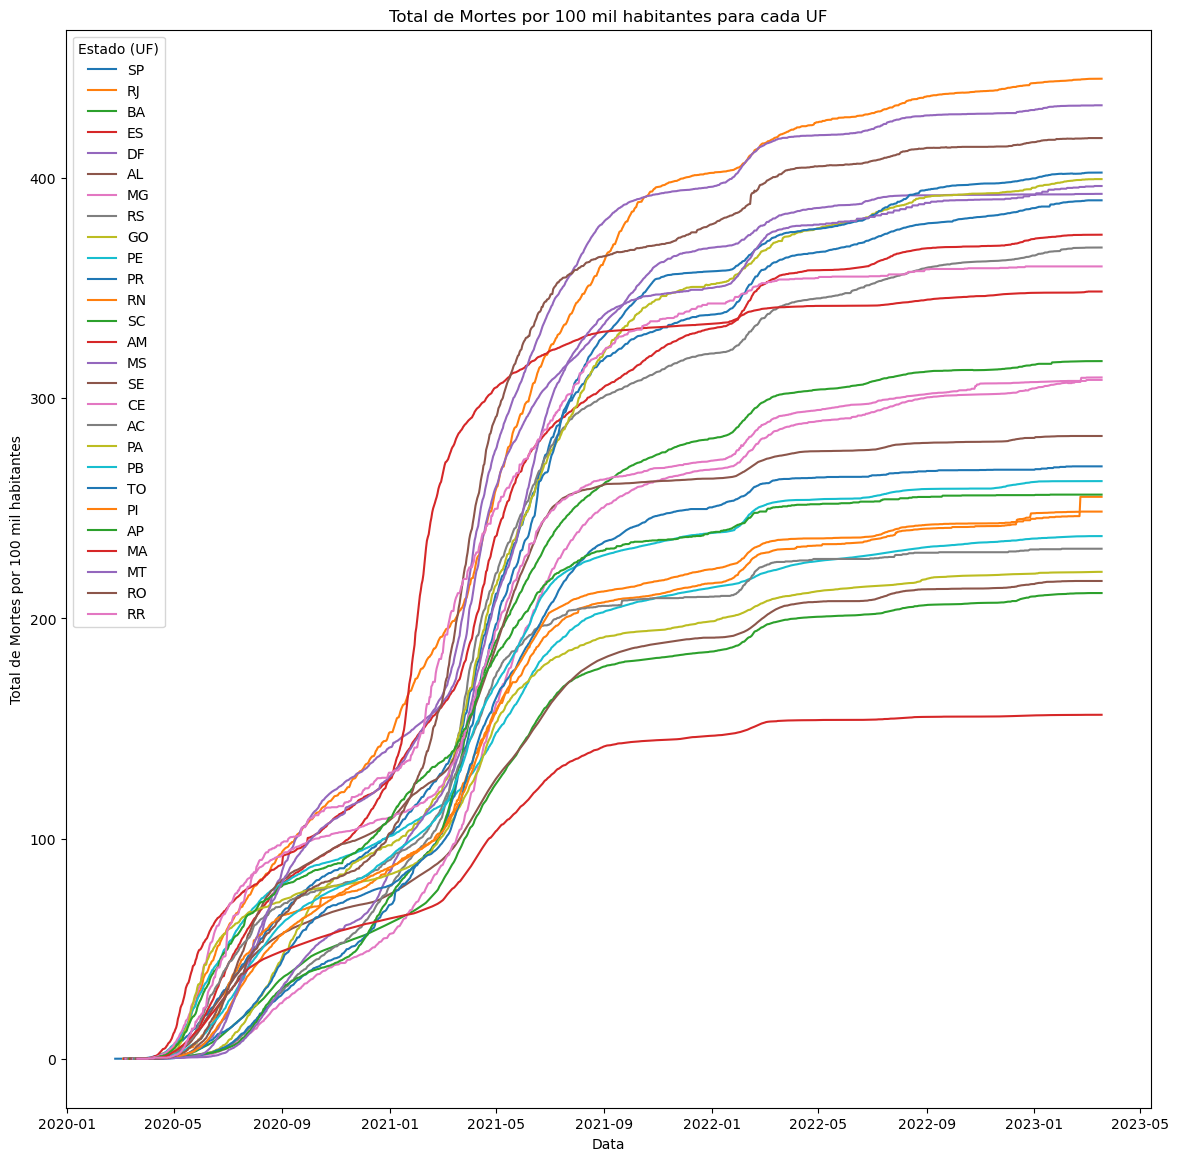

In [34]:
states = df_comparacao['state'].unique().tolist()

plt.figure(figsize=(14, 14))

for state in states:
    state_data = df_comparacao[df_comparacao['state'] == state]
    plt.plot(
        state_data['date'],
        state_data['deaths_per_100k_inhabitants'],
        label=state,
        linestyle='-',
        )


plt.title('Total de Mortes por 100 mil habitantes para cada UF')
plt.xlabel('Data')
plt.ylabel('Total de Mortes por 100 mil habitantes')

# plt.gcf().autofmt_xdate()

plt.legend(title='Estado (UF)')

plt.show()

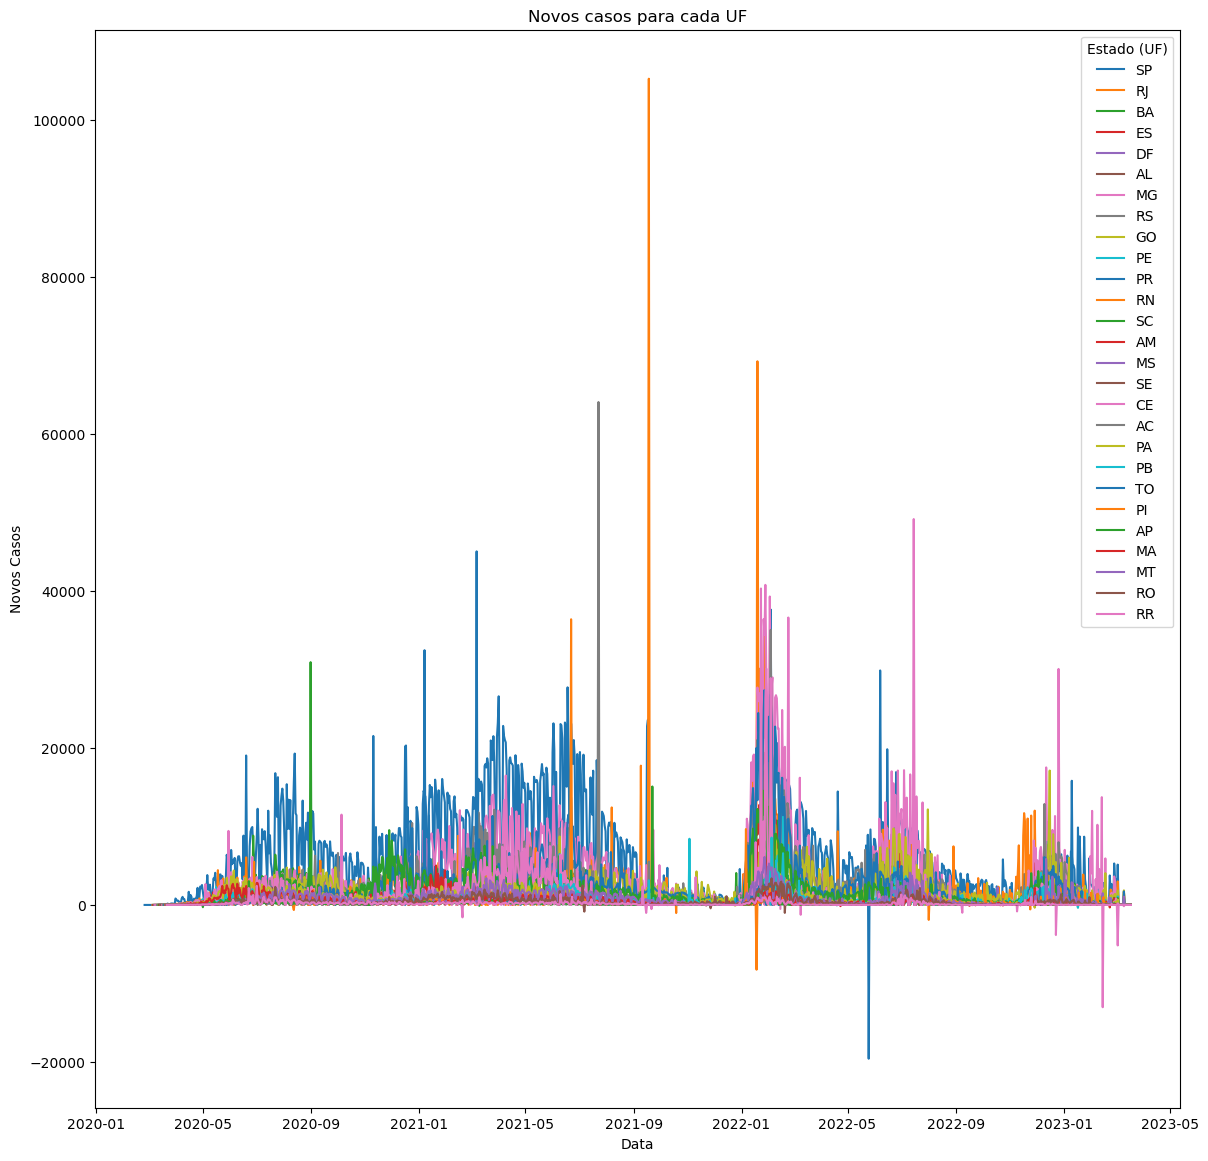

In [35]:
states = df_bruto['state'].unique().tolist()

plt.figure(figsize=(14, 14))

for state in states:
    state_data = df_bruto[df_bruto['state'] == state]
    plt.plot(
        state_data['date'],
        state_data['newCases'],
        label=state,
        linestyle='-',
        )


plt.title('Novos casos para cada UF')
plt.xlabel('Data')
plt.ylabel('Novos Casos')

# plt.gcf().autofmt_xdate()

plt.legend(title='Estado (UF)')

plt.show()

Percebemos que existem alguns valores negativos, o que mostra que há algo estranho nessa coluna. Vamos averiguar em mais detalhes.

In [36]:
negative_cases_df = df_bruto[df_bruto['newCases'] < 0]

In [37]:
negative_cases_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 1409 to 30595
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   epi_week           54 non-null     int64         
 1   date               54 non-null     datetime64[ns]
 2   state              54 non-null     object        
 3   newDeaths          54 non-null     int64         
 4   deaths             54 non-null     int64         
 5   newCases           54 non-null     int64         
 6   totalCases         54 non-null     int64         
 7   recovered          53 non-null     float64       
 8   suspects           54 non-null     float64       
 9   tests              54 non-null     float64       
 10  vaccinated         50 non-null     float64       
 11  vaccinated_second  50 non-null     float64       
 12  vaccinated_single  46 non-null     float64       
 13  vaccinated_third   44 non-null     float64       
 14  active_case

In [38]:
negative_cases_df.head(10)

epi_week       date state  newDeaths  deaths  newCases  totalCases  \
1409         18 2020-05-01    SC          2      50      -290        2104   
3606         30 2020-07-19    GO         20    1106       -13       40782   
4261         33 2020-08-11    RN          6    2025      -211       57921   
4289         33 2020-08-12    RN         17    2042      -649       57272   
9623        107 2021-02-19    CE         26   10922     -1582      406973   
10173       110 2021-03-10    SC        107    8277      -110      711953   
13474       127 2021-07-06    RO         13    6226       -47      251977   
13502       127 2021-07-07    RO          8    6234      -850      251127   
15463       137 2021-09-15    RR          2    1982     -1015      125840   
15615       138 2021-09-21    CE          1   24158      -531      935400   

       recovered  suspects      tests  vaccinated  vaccinated_second  \
1409         NaN     621.0    10621.0         NaN                NaN   
3606     12513.0   99654.0    82468.0         NaN                NaN   
4261     28243.0   18016.0   155861.0         NaN                NaN   
4289     28243.0   20144.0   155861.0         NaN                NaN   
9623    308294.0   37544.0  1373571.0    259525.0            44477.0   
10173   672006.0  127721.0  1683529.0    267902.0            81351.0   
13474   234484.0  365081.0   640738.0    540002.0           170092.0   
13502   234484.0  365081.0   640738.0    551086.0           175909.0   
15463   120282.0    5095.0   327716.0    310736.0           101104.0   
15615   809911.0   37894.0  2647712.0   5930187.0          3062110.0   

       vaccinated_single  vaccinated_third  active_cases  
1409                 NaN               NaN           NaN  
3606                 NaN               NaN       27163.0  
4261                 NaN               NaN       27653.0  
4289                 NaN               NaN       26987.0  
9623                 NaN               NaN       87757.0  
10173                NaN               NaN       31670.0  
13474                NaN               NaN       11267.0  
13502                NaN               NaN       10409.0  
15463            10231.0               NaN        3576.0  
15615           159426.0               NaN      101331.0

Será que o mesmo se repete para `newDeaths`?

In [39]:
negative_deaths_df = df_bruto[df_bruto['newDeaths'] < 0]
negative_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 1562 to 30007
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   epi_week           89 non-null     int64         
 1   date               89 non-null     datetime64[ns]
 2   state              89 non-null     object        
 3   newDeaths          89 non-null     int64         
 4   deaths             89 non-null     int64         
 5   newCases           89 non-null     int64         
 6   totalCases         89 non-null     int64         
 7   recovered          88 non-null     float64       
 8   suspects           89 non-null     float64       
 9   tests              89 non-null     float64       
 10  vaccinated         80 non-null     float64       
 11  vaccinated_second  79 non-null     float64       
 12  vaccinated_single  79 non-null     float64       
 13  vaccinated_third   74 non-null     float64       
 14  active_case

Precisaremos filtrar esses dados e removê-los, antes de continuar.
Vamos aplicar esse tratamento no nosso `df` original, e mais uma vez separar as colunas em dois datasets, como haviamos feito anteriormente.

In [40]:
# Tratamento: Removendo agregação em 'state'
df = df[df['newDeaths'] >= 0]
df = df[df['newCases'] >= 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29584 entries, 0 to 30840
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   epi_week                               29584 non-null  int64         
 1   date                                   29584 non-null  datetime64[ns]
 2   country                                29584 non-null  object        
 3   state                                  29584 non-null  object        
 4   city                                   29584 non-null  object        
 5   newDeaths                              29584 non-null  int64         
 6   deaths                                 29584 non-null  int64         
 7   newCases                               29584 non-null  int64         
 8   totalCases                             29584 non-null  int64         
 9   deathsMS                               29584 non-null  int64      

In [41]:
drop_columns = ['country', 'city', 'deaths_by_totalCases', 'deathsMS', 'totalCasesMS']
dados_brutos = ['newDeaths', 'deaths', 'newCases', 'totalCases', 'recovered',
                'suspects', 'tests', 'vaccinated', 'vaccinated_second',
                'vaccinated_single', 'vaccinated_third', 'active_cases']
dados_ajustados = ['deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
                    'tests_per_100k_inhabitants', 'vaccinated_per_100_inhabitants',
                    'vaccinated_second_per_100_inhabitants', 'vaccinated_single_per_100_inhabitants',
                    'vaccinated_third_per_100_inhabitants']

# fazemos drops no dataset original, combinando as colunas a serem descartadas de modo geral
# com as colunas que serao usadas apenas pelo dataset complementar
df_bruto = df.drop(columns=[*drop_columns, *dados_ajustados])
df_comparacao = df.drop(columns=[*drop_columns, *dados_brutos])

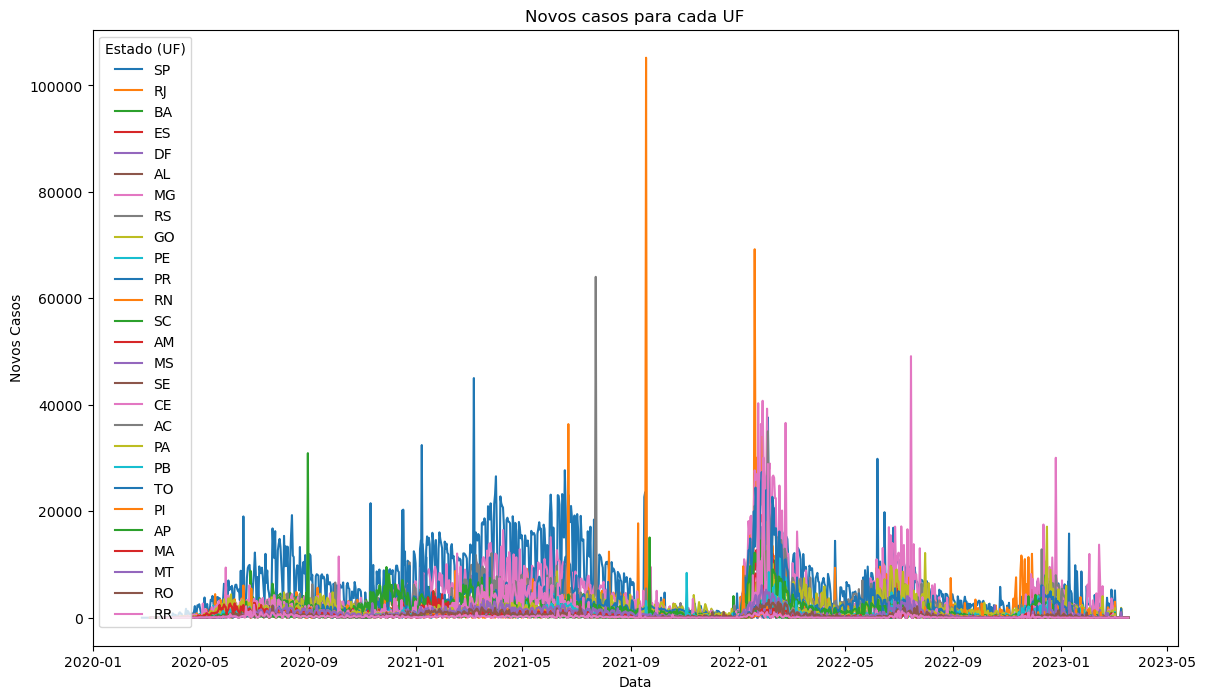

In [43]:
states = df_bruto['state'].unique().tolist()

plt.figure(figsize=(14, 8))

for state in states:
    state_data = df_bruto[df_bruto['state'] == state]
    plt.plot(
        state_data['date'],
        state_data['newCases'],
        label=state,
        linestyle='-',
        )


plt.title('Novos casos para cada UF')
plt.xlabel('Data')
plt.ylabel('Novos Casos')

# plt.gcf().autofmt_xdate()

plt.legend(title='Estado (UF)')

plt.show()

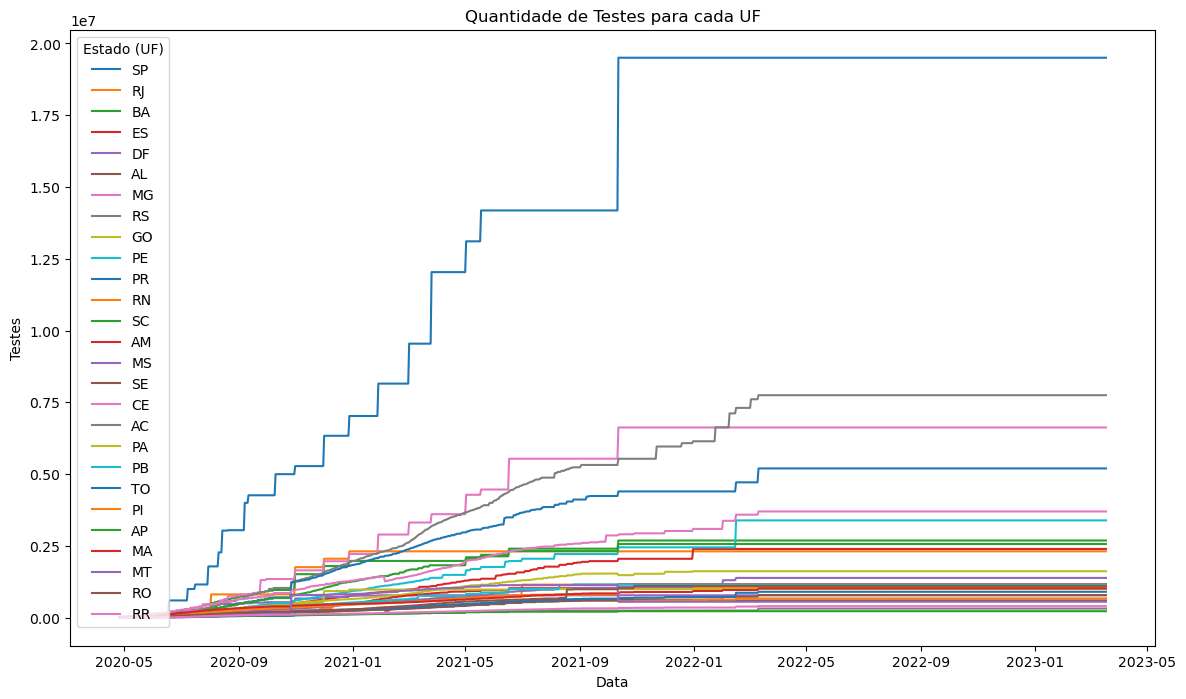

In [45]:
states = df_bruto['state'].unique().tolist()

plt.figure(figsize=(14, 8))

for state in states:
    state_data = df_bruto[df_bruto['state'] == state]
    plt.plot(
        state_data['date'],
        state_data['tests'],
        label=state,
        linestyle='-',
        )


plt.title('Quantidade de Testes para cada UF')
plt.xlabel('Data')
plt.ylabel('Número de Testes realizados')

# plt.gcf().autofmt_xdate()

plt.legend(title='Estado (UF)')

plt.show()

Vamos tentar entender um pouco mais como os dados se relacionam.

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


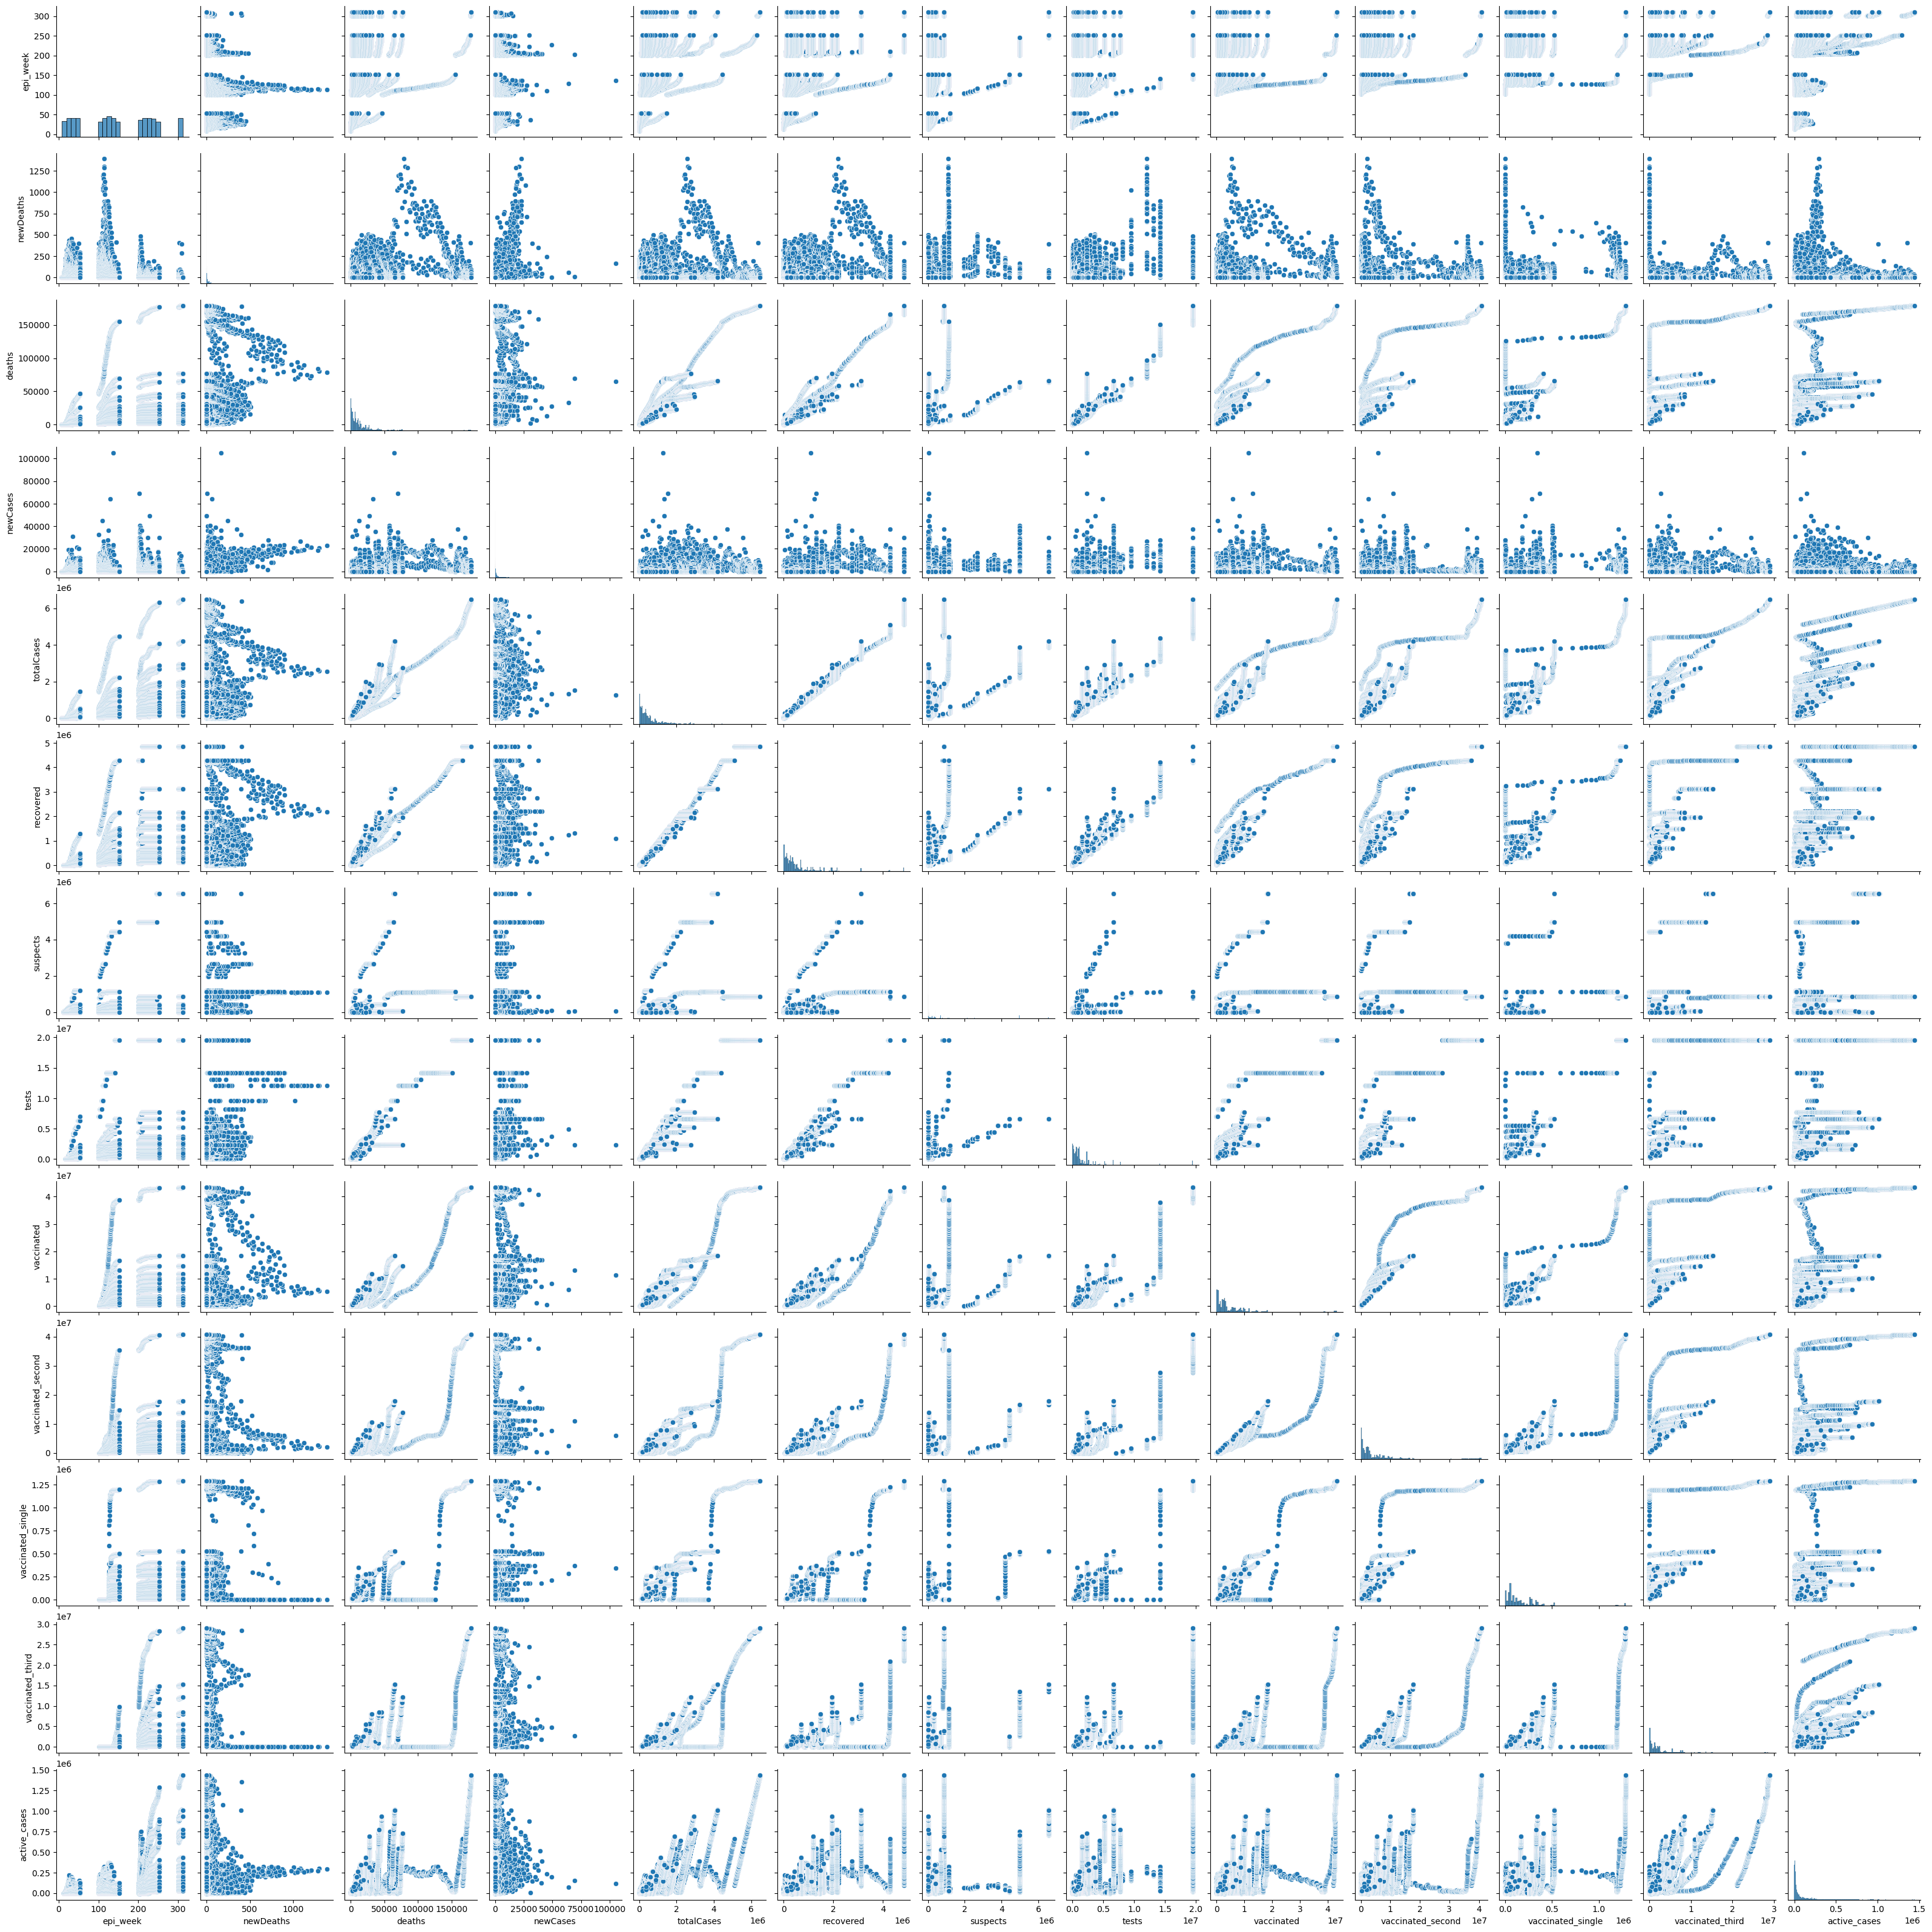

In [47]:
sns.pairplot(df_bruto)